# <div style="text-align: center"> <span style="font-size:28px;"><b>Rents in Ireland</b> </span></div>

In [54]:
#Importing the libraries
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import ptitprince
from __future__ import print_function 
%matplotlib inline 

In [55]:
#Reading the dataset
df = pd.read_csv(r"C:/Users/Fabiola/Downloads/Ireland_rents.csv")

#Displaying the first 10 rows of the dataset
df.head()

,STATISTIC Label,Quarter,Number of Bedrooms,Property Type,Location,UNIT,VALUE
0,RTB Average Monthly Rent Report,2007Q4,All bedrooms,All property types,Carlow,Euro,805.30
1,RTB Average Monthly Rent Report,2007Q4,All bedrooms,All property types,Carlow Town,Euro,NaN
2,RTB Average Monthly Rent Report,2007Q4,All bedrooms,All property types,"Graiguecullen, Carlow",Euro,NaN
3,RTB Average Monthly Rent Report,2007Q4,All bedrooms,All property types,"Tullow, Carlow",Euro,724.37
4,RTB Average Monthly Rent Report,2007Q4,All bedrooms,All property types,Cavan,Euro,587.92


In [56]:
#Displaying the last 10 rows of the dataset
df.tail()

,STATISTIC Label,Quarter,Number of Bedrooms,Property Type,Location,UNIT,VALUE
802795,RTB Average Monthly Rent Report,2022Q3,Four plus bed,Other flats,"Delgany, Wicklow",Euro,NaN
802796,RTB Average Monthly Rent Report,2022Q3,Four plus bed,Other flats,"Greystones, Wicklow",Euro,NaN
802797,RTB Average Monthly Rent Report,2022Q3,Four plus bed,Other flats,"Kilcoole, Wicklow",Euro,NaN
802798,RTB Average Monthly Rent Report,2022Q3,Four plus bed,Other flats,"Newtownmountkennedy, Wicklow",Euro,NaN
802799,RTB Average Monthly Rent Report,2022Q3,Four plus bed,Other flats,"Rathnew, Wicklow",Euro,NaN


In [57]:
#Checking the size
df.shape

(802800, 7)

In [58]:
#Gettig some information about the dataset
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802800 entries, 0 to 802799
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   STATISTIC Label     802800 non-null  object 
 1   Quarter             802800 non-null  object 
 2   Number of Bedrooms  802800 non-null  object 
 3   Property Type       802800 non-null  object 
 4   Location            802800 non-null  object 
 5   UNIT                802800 non-null  object 
 6   VALUE               204771 non-null  float64
dtypes: float64(1), object(6)
memory usage: 42.9+ MB


In [59]:
#Statistical description of the numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VALUE,204771.0,1011.750505,479.345992,233.67,650.32,901.88,1252.335,6522.48


In [60]:
#Statistical description of the categorical variables
df.describe(include=object).T

,count,unique,top,freq
STATISTIC Label,802800,1,RTB Average Monthly Rent Report,802800
Quarter,802800,60,2007Q4,13380
Number of Bedrooms,802800,5,All bedrooms,160560
Property Type,802800,6,All property types,133800
Location,802800,446,Carlow,1800
UNIT,802800,1,Euro,802800


In [61]:
#Checking duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)

number of duplicate rows: (0, 7)


In [62]:
#Reviewing missing values
df.isnull().values.any()

True

In [63]:
#Total missing values per column
df.isnull().sum()

STATISTIC Label            0
Quarter                    0
Number of Bedrooms         0
Property Type              0
Location                   0
UNIT                       0
VALUE                 598029
dtype: int64

In [64]:
#Percentage of missing values per feature
mis_value_percent = 100 * df.isnull().sum() / len(df)
print(mis_value_percent)

STATISTIC Label        0.0000
Quarter                0.0000
Number of Bedrooms     0.0000
Property Type          0.0000
Location               0.0000
UNIT                   0.0000
VALUE                 74.4929
dtype: float64


<AxesSubplot:>

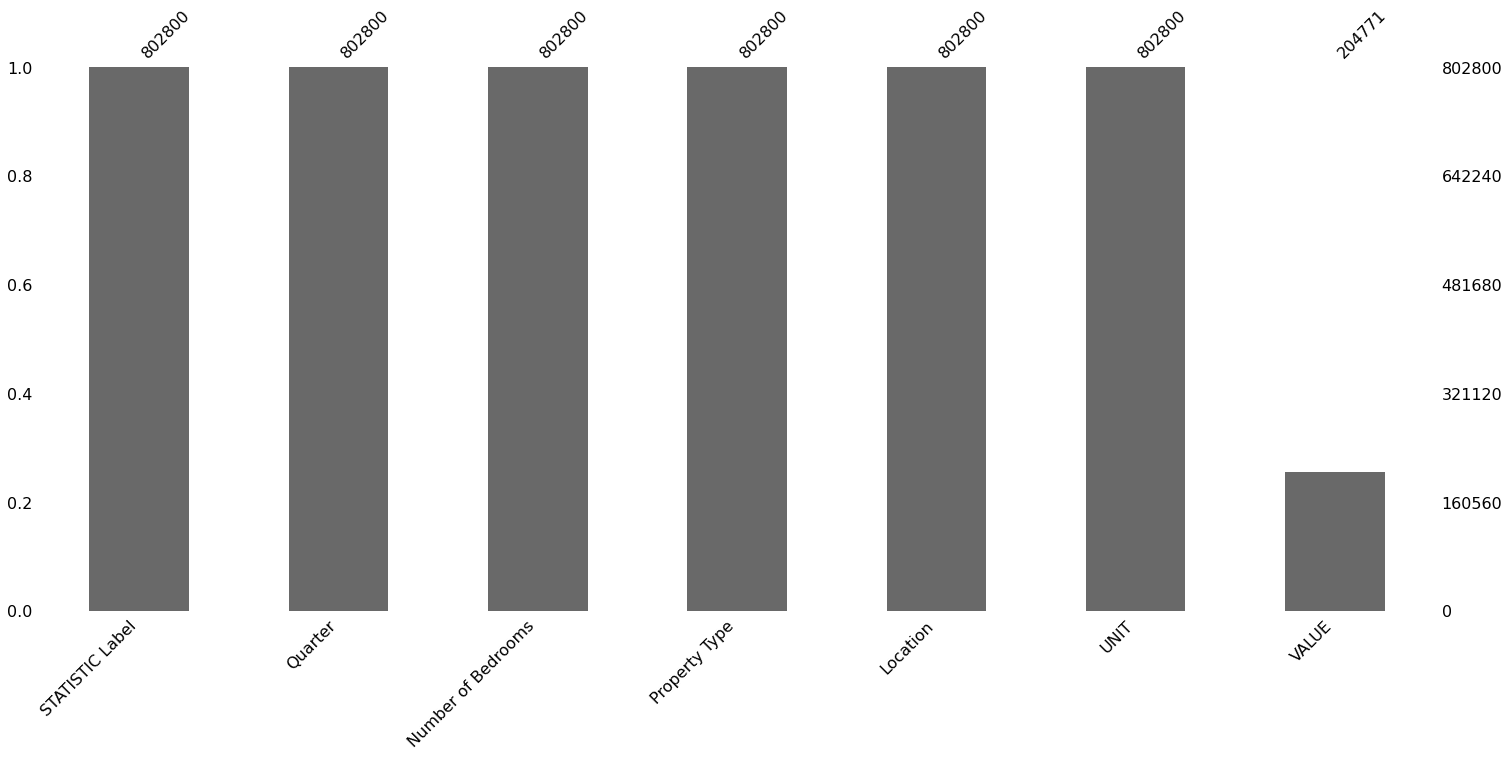

In [65]:
#Visualising missing values graphically
msno.bar(df)

<AxesSubplot:>

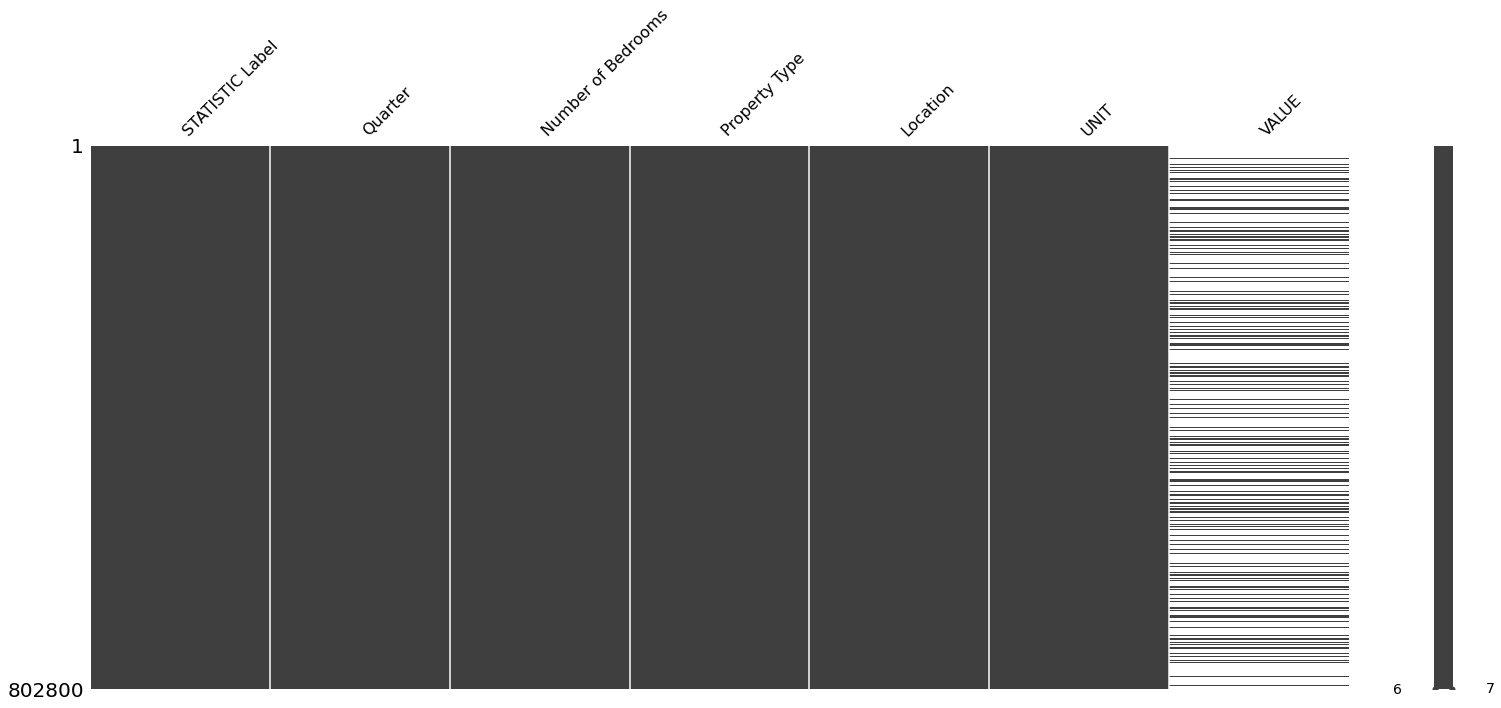

In [66]:
#Visualising missing values graphically
msno.matrix(df)

Next we will analyze the unique values ​​per column.

In [67]:
#Analyzing unique values ​​within the STATISTIC column
df['STATISTIC Label'].unique()

array(['RTB Average Monthly Rent Report'], dtype=object)

In [68]:
#Analyzing unique values ​​within the Quarter column
df['Quarter'].unique()

array(['2007Q4', '2008Q1', '2008Q2', '2008Q3', '2008Q4', '2009Q1',
       '2009Q2', '2009Q3', '2009Q4', '2010Q1', '2010Q2', '2010Q3',
       '2010Q4', '2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1',
       '2012Q2', '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3',
       '2013Q4', '2014Q1', '2014Q2', '2014Q3', '2014Q4', '2015Q1',
       '2015Q2', '2015Q3', '2015Q4', '2016Q1', '2016Q2', '2016Q3',
       '2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1',
       '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3',
       '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1',
       '2021Q2', '2021Q3', '2021Q4', '2022Q1', '2022Q2', '2022Q3'],
      dtype=object)

In [69]:
#Analysing the total frequency by category
df['Quarter'].value_counts()

2007Q4    13380
2008Q1    13380
2015Q4    13380
2016Q1    13380
2016Q2    13380
2016Q3    13380
2016Q4    13380
2017Q1    13380
2017Q2    13380
2017Q3    13380
2017Q4    13380
2018Q1    13380
2018Q2    13380
2018Q3    13380
2018Q4    13380
2019Q1    13380
2019Q2    13380
2019Q3    13380
2019Q4    13380
2020Q1    13380
2020Q2    13380
2020Q3    13380
2020Q4    13380
2021Q1    13380
2021Q2    13380
2021Q3    13380
2021Q4    13380
2022Q1    13380
2022Q2    13380
2015Q3    13380
2015Q2    13380
2015Q1    13380
2011Q2    13380
2008Q2    13380
2008Q3    13380
2008Q4    13380
2009Q1    13380
2009Q2    13380
2009Q3    13380
2009Q4    13380
2010Q1    13380
2010Q2    13380
2010Q3    13380
2010Q4    13380
2011Q1    13380
2011Q3    13380
2014Q4    13380
2011Q4    13380
2012Q1    13380
2012Q2    13380
2012Q3    13380
2012Q4    13380
2013Q1    13380
2013Q2    13380
2013Q3    13380
2013Q4    13380
2014Q1    13380
2014Q2    13380
2014Q3    13380
2022Q3    13380
Name: Quarter, dtype: int64

In [70]:
#Analyzing unique values ​​within the Number of Bedrooms column
df['Number of Bedrooms'].unique()

array(['All bedrooms', 'One bed', 'Two bed', 'Three bed', 'Four plus bed'],
      dtype=object)

In [71]:
#Analysing the total frequency by category
df['Number of Bedrooms'].value_counts()

All bedrooms     160560
One bed          160560
Two bed          160560
Three bed        160560
Four plus bed    160560
Name: Number of Bedrooms, dtype: int64

In [72]:
#Analyzing unique values ​​within the Property Type column
df['Property Type'].unique()

array(['All property types', 'Detached house', 'Semi detached house',
       'Terrace house', 'Apartment', 'Other flats'], dtype=object)

In [73]:
#Analysing the total frequency by category
df['Property Type'].value_counts()

All property types     133800
Detached house         133800
Semi detached house    133800
Terrace house          133800
Apartment              133800
Other flats            133800
Name: Property Type, dtype: int64

In [74]:
#Analyzing unique values ​​within the Location column
df['Location'].unique()

array(['Carlow', 'Carlow Town', 'Graiguecullen, Carlow', 'Tullow, Carlow',
       'Cavan', 'Cavan Town', 'Bailieborough, Cavan',
       'Ballyconnell, Cavan', 'Ballyjamesduff, Cavan', 'Belturbet, Cavan',
       'Cootehill, Cavan', 'Kingscourt, Cavan', 'Virginia, Cavan',
       'Clare', 'Ennis, Clare', 'Killaloe, Clare', 'Kilrush, Clare',
       'Newmarket-On-Fergus, Clare', 'Shannon, Clare',
       'Sixmilebridge, Clare', 'Cork', 'Cork City', 'Ballincollig, Cork',
       'Ballintemple, Cork', 'Ballinure, Cork', 'Bandon, Cork',
       'Bantry, Cork', 'Bishopstown, Cork', 'Blackpool, Cork',
       'Blackrock, Cork', 'Blarney, Cork', 'Carrigaline, Cork',
       'Carrigtwohill, Cork', 'Castlemartyr, Cork', 'Charleville, Cork',
       'Clonakilty, Cork', 'Cloyne, Cork', 'Cobh, Cork',
       'Crosshaven, Cork', 'Douglas, Cork', 'Dunmanway, Cork',
       'Fermoy, Cork', 'Frankfield, Cork', 'Glanmire, Cork',
       'Kanturk, Cork', 'Kinsale, Cork', 'Macroom, Cork', 'Mallow, Cork',
       'Midl

In [75]:
#Analysing the total frequency by category
df['Location'].value_counts()

Carlow                         1800
Callan, Kilkenny               1800
Carrick-On-Shannon, Leitrim    1800
Leitrim                        1800
Portlaoise, Laois              1800
                               ... 
Harolds Cross, Dublin 6W       1800
Dublin 6W                      1800
Terenure, Dublin 6             1800
Rathmines, Dublin 6            1800
Rathnew, Wicklow               1800
Name: Location, Length: 446, dtype: int64

In [76]:
#Analyzing unique values ​​within the UNIT column
df['UNIT'].unique()

array(['Euro'], dtype=object)

In [77]:
#Analysing the total frequency by category
df['UNIT'].value_counts()

Euro    802800
Name: UNIT, dtype: int64

**DATA PREPARATION**

Since a high percentage of missing values have been presented and to have a better management of our database, we will proceed to eliminate those rows with missing data.

In [78]:
# Dropping rows with missing values
df2 = df.dropna()

In [79]:
#Checking the size
df2.shape

(204771, 7)

In [80]:
#Dropping unnecesary columns
df2.drop(['STATISTIC Label','UNIT'], axis=1, inplace=True)


c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [81]:
df2.head(10)

,Quarter,Number of Bedrooms,Property Type,Location,VALUE
0,2007Q4,All bedrooms,All property types,Carlow,805.30
3,2007Q4,All bedrooms,All property types,"Tullow, Carlow",724.37
4,2007Q4,All bedrooms,All property types,Cavan,587.92
10,2007Q4,All bedrooms,All property types,"Cootehill, Cavan",572.56
13,2007Q4,All bedrooms,All property types,Clare,715.90
14,2007Q4,All bedrooms,All property types,"Ennis, Clare",699.39
18,2007Q4,All bedrooms,All property types,"Shannon, Clare",760.81
20,2007Q4,All bedrooms,All property types,Cork,956.63
21,2007Q4,All bedrooms,All property types,Cork City,1046.73
22,2007Q4,All bedrooms,All property types,"Ballincollig, Cork",1043.01


In [82]:
# Convert the date column to datetime
df2['Quarter'] = pd.to_datetime(df2['Quarter'])

C:\Users\Fabiola\AppData\Local\Temp/ipykernel_24368/3577300986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Quarter'] = pd.to_datetime(df2['Quarter'])


In [83]:
df2

,Quarter,Number of Bedrooms,Property Type,Location,VALUE
0,2007-10-01,All bedrooms,All property types,Carlow,805.30
3,2007-10-01,All bedrooms,All property types,"Tullow, Carlow",724.37
4,2007-10-01,All bedrooms,All property types,Cavan,587.92
10,2007-10-01,All bedrooms,All property types,"Cootehill, Cavan",572.56
13,2007-10-01,All bedrooms,All property types,Clare,715.90
...,...,...,...,...,...
801929,2022-07-01,Four plus bed,Apartment,Cork City,1798.44
801979,2022-07-01,Four plus bed,Apartment,Dublin,2684.59
802146,2022-07-01,Four plus bed,Apartment,Galway,1640.42
802147,2022-07-01,Four plus bed,Apartment,Galway City,1799.70


In [84]:
#Breaking Down the Date into 3 Components
df2['Day']=df2['Quarter'].dt.day

df2["Month"]=df2.Quarter.dt.month_name().str[:3]

df2['Year']=df2['Quarter'].dt.year

C:\Users\Fabiola\AppData\Local\Temp/ipykernel_24368/1955809298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Day']=df2['Quarter'].dt.day
C:\Users\Fabiola\AppData\Local\Temp/ipykernel_24368/1955809298.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Month"]=df2.Quarter.dt.month_name().str[:3]
C:\Users\Fabiola\AppData\Local\Temp/ipykernel_24368/1955809298.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [85]:
#Creating new columns for the new components...
df2['Day of the week'] = df2.Quarter.dt.dayofweek
df2['Day of the week'] = df2['Day of the week'].map({0: "Monday",1: "Tuesday",2: "Wednesday" ,3: "Thursday",4:"Friday",5:"Saturday",6:"Sunday"}) #Renaming the days of the week
df2['Day of the week'] = pd.Categorical(df2['Day of the week'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

C:\Users\Fabiola\AppData\Local\Temp/ipykernel_24368/4257607487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Day of the week'] = df2.Quarter.dt.dayofweek
C:\Users\Fabiola\AppData\Local\Temp/ipykernel_24368/4257607487.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Day of the week'] = df2['Day of the week'].map({0: "Monday",1: "Tuesday",2: "Wednesday" ,3: "Thursday",4:"Friday",5:"Saturday",6:"Sunday"}) #Renaming the days of the week
C:\Users\Fabiola\AppData\Local\Temp/ipykernel_24368/4257

In [86]:
df2.rename(columns = {'Number of Bedrooms':'Bedrooms', 'Property Type':'Property'}, inplace = True)

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


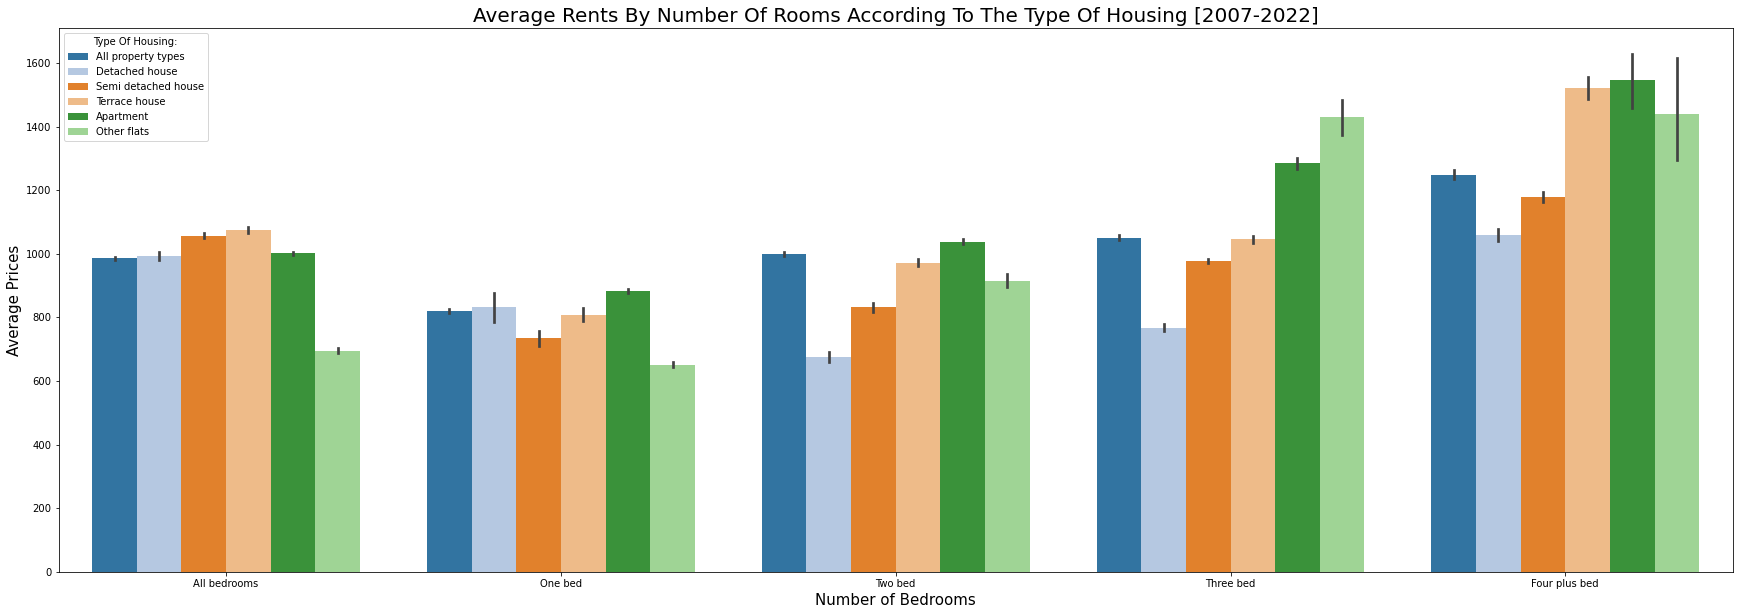

In [87]:
#Bar graph of average rent, from 2007 to 2022.
f, ax = plt.subplots(1, 1, figsize=(30, 10))
ax =sns.barplot(x='Bedrooms', y='VALUE', hue='Property', data=df2, palette='tab20')

plt.title('Average Rents By Number Of Rooms According To The Type Of Housing [2007-2022]', fontsize =20)
plt.ylabel("Average Prices", fontsize =15)
plt.xlabel('Number of Bedrooms', fontsize =15)


plt.legend(title = "Type Of Housing:", loc='upper left', fontsize=10)

plt.savefig('barplot2.png', dpi=300, bbox_inches='tight');

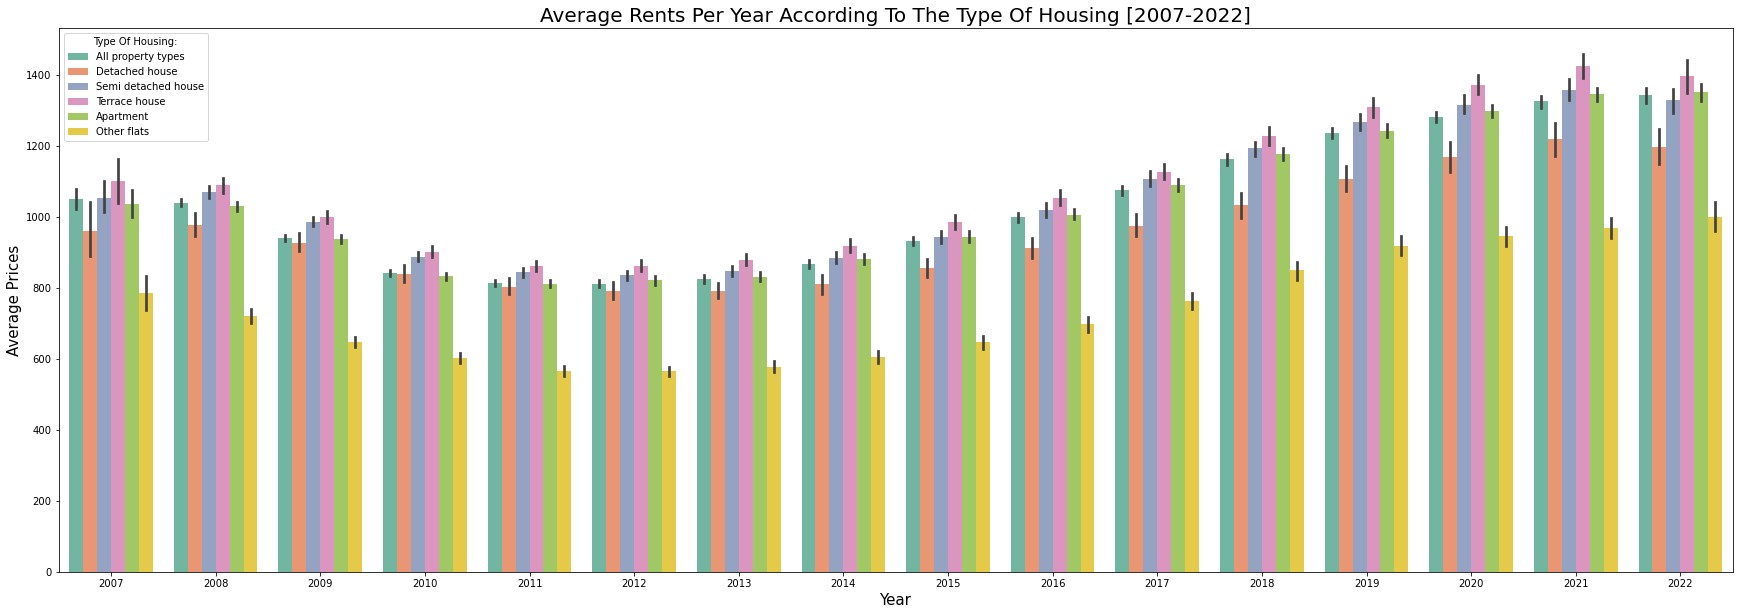

In [88]:
#Bar graph of average rent, from 2007 to 2022.
f, ax = plt.subplots(1, 1, figsize=(30, 10))
ax =sns.barplot(x='Year', y='VALUE', hue='Property', data=df2, palette='Set2')

plt.title('Average Rents Per Year According To The Type Of Housing [2007-2022]', fontsize =20)
plt.ylabel("Average Prices", fontsize =15)
plt.xlabel('Year', fontsize =15)


plt.legend(title = "Type Of Housing:", loc='upper left', fontsize=10)

plt.savefig('barplot2.png', dpi=300, bbox_inches='tight');

In [89]:
df2

,Quarter,Bedrooms,Property,Location,VALUE,Day,Month,Year,Day of the week
0,2007-10-01,All bedrooms,All property types,Carlow,805.30,1,Oct,2007,Monday
3,2007-10-01,All bedrooms,All property types,"Tullow, Carlow",724.37,1,Oct,2007,Monday
4,2007-10-01,All bedrooms,All property types,Cavan,587.92,1,Oct,2007,Monday
10,2007-10-01,All bedrooms,All property types,"Cootehill, Cavan",572.56,1,Oct,2007,Monday
13,2007-10-01,All bedrooms,All property types,Clare,715.90,1,Oct,2007,Monday
...,...,...,...,...,...,...,...,...,...
801929,2022-07-01,Four plus bed,Apartment,Cork City,1798.44,1,Jul,2022,Friday
801979,2022-07-01,Four plus bed,Apartment,Dublin,2684.59,1,Jul,2022,Friday
802146,2022-07-01,Four plus bed,Apartment,Galway,1640.42,1,Jul,2022,Friday
802147,2022-07-01,Four plus bed,Apartment,Galway City,1799.70,1,Jul,2022,Friday


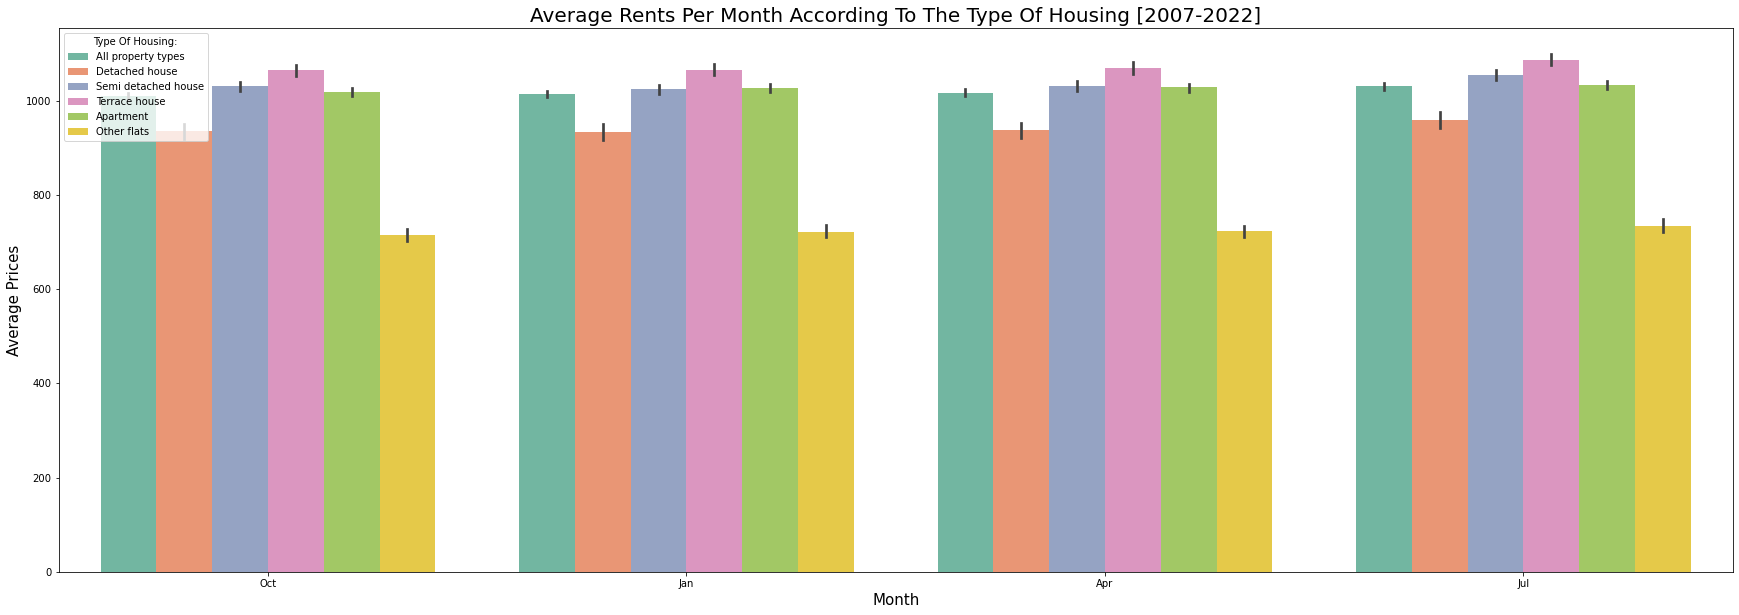

In [90]:
#Bar graph of average rent, from 2007 to 2022.
f, ax = plt.subplots(1, 1, figsize=(30, 10))
ax =sns.barplot(x='Month', y='VALUE', hue='Property', data=df2, palette='Set2')

plt.title('Average Rents Per Month According To The Type Of Housing [2007-2022]', fontsize =20)
plt.ylabel("Average Prices", fontsize =15)
plt.xlabel('Month', fontsize =15)


plt.legend(title = "Type Of Housing:", loc='upper left', fontsize=10)

plt.savefig('barplot2.png', dpi=300, bbox_inches='tight');

We rank the average rents in ascending order.

In [91]:
#We sort the values from the smallest to the largest

df2.sort_values(['Year', 'VALUE'], ascending = True, axis = 0, inplace = True)
df2.head(20)

c:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Quarter,Bedrooms,Property,Location,VALUE,Day,Month,Year,Day of the week
382,2007-10-01,All bedrooms,All property types,"Lough Gill, Sligo",277.08,1,Oct,2007,Monday
2166,2007-10-01,All bedrooms,Apartment,"Lough Gill, Sligo",277.08,1,Oct,2007,Monday
8410,2007-10-01,Three bed,All property types,"Lough Gill, Sligo",277.08,1,Oct,2007,Monday
10194,2007-10-01,Three bed,Apartment,"Lough Gill, Sligo",277.08,1,Oct,2007,Monday
10079,2007-10-01,Three bed,Apartment,Kerry,369.00,1,Oct,2007,Monday
10055,2007-10-01,Three bed,Apartment,"Ballybrit, Galway",390.56,1,Oct,2007,Monday
2738,2007-10-01,One bed,All property types,Donegal,418.03,1,Oct,2007,Monday
10804,2007-10-01,Four plus bed,All property types,"I.F.S.C., Dublin 1",446.22,1,Oct,2007,Monday
12588,2007-10-01,Four plus bed,Apartment,"I.F.S.C., Dublin 1",446.22,1,Oct,2007,Monday
8271,2007-10-01,Three bed,All property types,"Ballybrit, Galway",455.24,1,Oct,2007,Monday


In [92]:
#We sort the values from the largest to the smallest

df2.sort_values(['Year', 'VALUE'], ascending = False, axis = 0, inplace = True)
df2.head(20)

c:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Quarter,Bedrooms,Property,Location,VALUE,Day,Month,Year,Day of the week
800255,2022-07-01,Four plus bed,All property types,"Sandymount, Dublin 4",4415.44,1,Jul,2022,Friday
786884,2022-04-01,Four plus bed,All property types,"Ranelagh, Dublin 6",4070.16,1,Apr,2022,Friday
774827,2022-01-01,Four plus bed,Terrace house,"Ballsbridge, Dublin 4",4069.47,1,Jan,2022,Saturday
800249,2022-07-01,Four plus bed,All property types,"Ballsbridge, Dublin 4",4061.81,1,Jul,2022,Friday
800643,2022-07-01,Four plus bed,Detached house,"Blackrock, Dublin",4060.55,1,Jul,2022,Friday
800264,2022-07-01,Four plus bed,All property types,"Ranelagh, Dublin 6",4009.48,1,Jul,2022,Friday
788207,2022-04-01,Four plus bed,Terrace house,"Ballsbridge, Dublin 4",3977.54,1,Apr,2022,Friday
786869,2022-04-01,Four plus bed,All property types,"Ballsbridge, Dublin 4",3946.59,1,Apr,2022,Friday
773489,2022-01-01,Four plus bed,All property types,"Ballsbridge, Dublin 4",3929.61,1,Jan,2022,Saturday
787263,2022-04-01,Four plus bed,Detached house,"Blackrock, Dublin",3913.32,1,Apr,2022,Friday


In [93]:
df2.pivot_table(index='Location', values=['VALUE'], aggfunc=np.sum)

,VALUE
Location,
"Abbeyfeale, Limerick",71703.63
"Annacotty, Limerick",216229.51
"Arbour Hill, Dublin 7",59347.58
"Ardee, Louth",248101.54
"Arklow, Wicklow",710894.99
...,...
Wicklow,1456869.48
Wicklow Town,585847.01
"Wilton, Cork",548516.14


In [94]:
df2.pivot_table(index='Location', values=['VALUE'], aggfunc=np.sum, margins=True)

,VALUE
Location,
"Abbeyfeale, Limerick",7.170363e+04
"Annacotty, Limerick",2.162295e+05
"Arbour Hill, Dublin 7",5.934758e+04
"Ardee, Louth",2.481015e+05
"Arklow, Wicklow",7.108950e+05
...,...
Wicklow Town,5.858470e+05
"Wilton, Cork",5.485161e+05
"Woodquay, Galway",5.299763e+04


In [95]:
df2.pivot_table(index='Location', values=['VALUE'], aggfunc=np.mean)

,VALUE
Location,
"Abbeyfeale, Limerick",519.591522
"Annacotty, Limerick",978.414072
"Arbour Hill, Dublin 7",1447.501951
"Ardee, Louth",777.747774
"Arklow, Wicklow",808.754255
...,...
Wicklow,1028.862627
Wicklow Town,976.411683
"Wilton, Cork",965.697430


In [96]:
np.round(df2.pivot_table(index='Location', values=['VALUE'], aggfunc=np.mean),2)

,VALUE
Location,
"Abbeyfeale, Limerick",519.59
"Annacotty, Limerick",978.41
"Arbour Hill, Dublin 7",1447.50
"Ardee, Louth",777.75
"Arklow, Wicklow",808.75
...,...
Wicklow,1028.86
Wicklow Town,976.41
"Wilton, Cork",965.70


In [99]:
df2.pivot_table(index=['Location', 'Bedrooms'], values=['VALUE'], aggfunc=np.sum)

VALUE
Location             Bedrooms                
Abbeyfeale, Limerick All bedrooms    44437.68
                     Three bed       25696.26
                     Two bed          1569.69
Annacotty, Limerick  All bedrooms   124720.79
                     Four plus bed   60495.23
...                                       ...
Youghal, Cork        All bedrooms   188540.17
                     Four plus bed   16614.89
                     One bed         19245.16
                     Three bed       85922.64
                     Two bed         69036.56

[1662 rows x 1 columns]

In [100]:
df2.pivot_table(index=['Location', 'Property'], values=['VALUE'], aggfunc=np.sum)

VALUE
Location             Property                      
Abbeyfeale, Limerick All property types    48515.62
                     Semi detached house   23188.01
Annacotty, Limerick  All property types   147700.74
                     Apartment              4260.18
                     Semi detached house   44973.07
...                                             ...
Youghal, Cork        All property types   152569.89
                     Apartment             68538.95
                     Detached house        34911.59
                     Semi detached house   85565.97
                     Terrace house         37773.02

[1659 rows x 1 columns]

In [102]:
df2.pivot_table(index=['Location', 'Bedrooms'], values=['VALUE'], columns=['Month'], aggfunc=np.sum)

VALUE                              
Month                                    Apr       Jan       Jul       Oct
Location             Bedrooms                                             
Abbeyfeale, Limerick All bedrooms   11040.28  10968.53  11566.57  10862.30
                     Three bed       5785.62   6221.56   6839.24   6849.84
                     Two bed          387.16    382.53    393.55    406.45
Annacotty, Limerick  All bedrooms   30067.02  29194.57  34381.53  31077.67
                     Four plus bed  14438.50  13443.51  17879.88  14733.34
...                                      ...       ...       ...       ...
Youghal, Cork        All bedrooms   46908.29  46086.99  48704.50  46840.39
                     Four plus bed   4427.73   2979.63   4376.08   4831.45
                     One bed         4204.36   3907.90   5599.23   5533.67
                     Three bed      21638.39  21656.25  21798.54  20829.46
                     Two bed        16867.36  17430.26  18209.00  16529.94

[1662 rows x 4 columns]

In [106]:
df2.pivot_table(index=['Location', 'Property'], values=['VALUE'], columns=['Month'], aggfunc=np.sum)

VALUE                      \
Month                                          Apr       Jan       Jul   
Location             Property                                            
Abbeyfeale, Limerick All property types   11799.96  11742.09  12827.17   
                     Semi detached house   5413.10   5830.53   5972.19   
Annacotty, Limerick  All property types   35875.68  33613.49  39645.61   
                     Apartment              840.81    830.50   1680.87   
                     Semi detached house   9764.18   9753.87  14358.90   
...                                            ...       ...       ...   
Youghal, Cork        All property types   38147.59  36088.97  39298.27   
                     Apartment            17347.94  16131.48  18529.40   
                     Detached house        8019.73   7963.92   9441.93   
                     Semi detached house  21716.92  21751.70  21909.20   
                     Terrace house         8813.95  10124.96   9508.55   

                                                    
Month                                          Oct  
Location             Property                       
Abbeyfeale, Limerick All property types   12146.40  
                     Semi detached house   5972.19  
Annacotty, Limerick  All property types   38565.96  
                     Apartment              908.00  
                     Semi detached house  11096.12  
...                                            ...  
Youghal, Cork        All property types   39035.06  
                     Apartment            16530.13  
                     Detached house        9486.01  
                     Semi detached house  20188.15  
                     Terrace house         9325.56  

[1659 rows x 4 columns]


Next we filter the information corresponding only to the rents in Dublin.

In [ ]:
df_Dublin=df2[df2["Location"]=='Dublin']

In [ ]:
df_Dublin

,Quarter,Number of Bedrooms,Property Type,Location,VALUE,Day,Month,Year,Day of the week
800641,2022-07-01,Four plus bed,Detached house,Dublin,3305.07,1,Jul,2022,Friday
787261,2022-04-01,Four plus bed,Detached house,Dublin,3241.19,1,Apr,2022,Friday
773881,2022-01-01,Four plus bed,Detached house,Dublin,3202.95,1,Jan,2022,Saturday
801533,2022-07-01,Four plus bed,Terrace house,Dublin,2948.42,1,Jul,2022,Friday
788153,2022-04-01,Four plus bed,Terrace house,Dublin,2887.01,1,Apr,2022,Friday
...,...,...,...,...,...,...,...,...,...
4085,2007-10-01,One bed,Terrace house,Dublin,1007.13,1,Oct,2007,Monday
2747,2007-10-01,One bed,All property types,Dublin,992.81,1,Oct,2007,Monday
2301,2007-10-01,All bedrooms,Other flats,Dublin,868.02,1,Oct,2007,Monday
3639,2007-10-01,One bed,Semi detached house,Dublin,861.91,1,Oct,2007,Monday


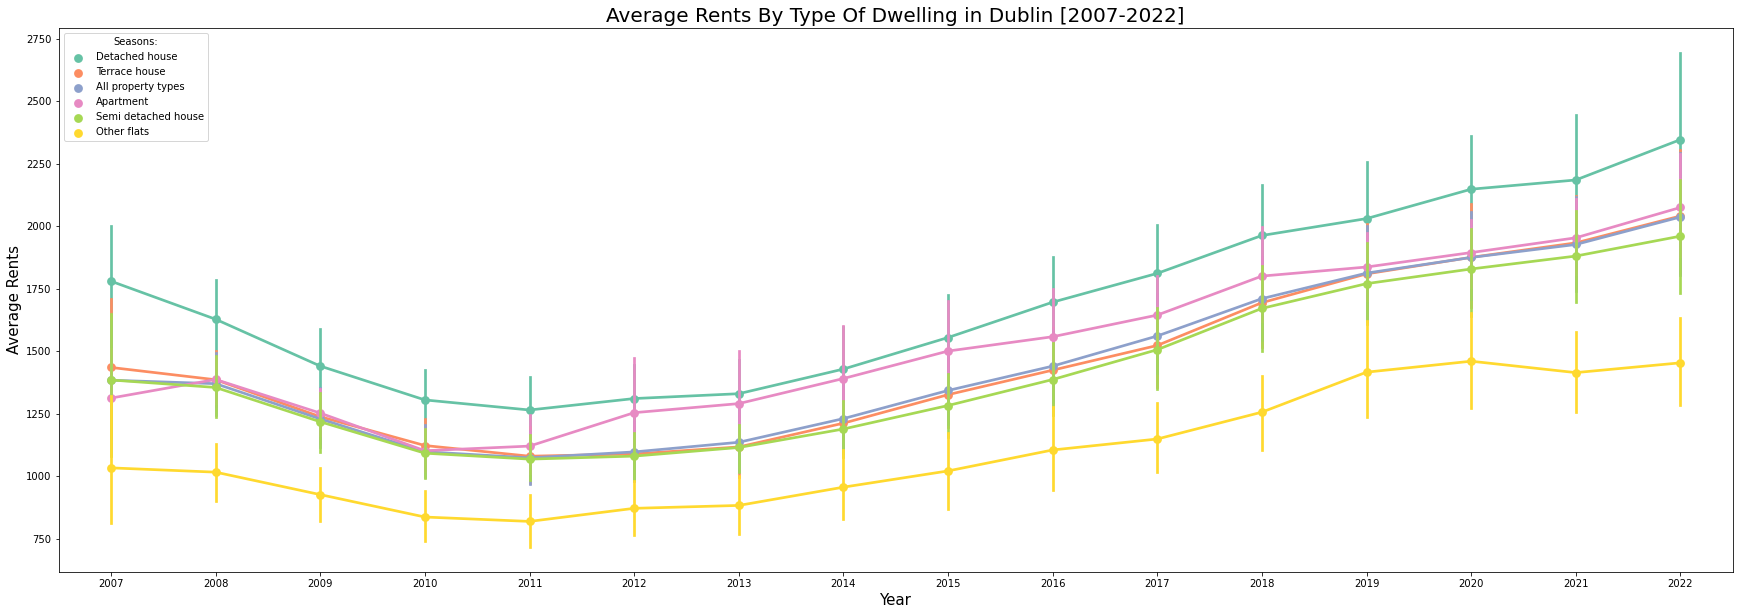

In [ ]:
#Time series of average rents by type of dwelling in Dublin from 2007 to 2022

fig, ax = plt.subplots(figsize=(30, 10))
sns.pointplot(x='Year', y='VALUE', hue='Property Type', data=df_Dublin, palette='Set2')

plt.title('Average Rents By Type Of Dwelling in Dublin [2007-2022]', fontsize =20)
plt.ylabel("Average Rents", fontsize =15)
plt.xlabel('Year', fontsize =15)


plt.legend(title = "Seasons:", loc='upper left', fontsize=10)

plt.savefig('pointplot.png', dpi=300, bbox_inches='tight');

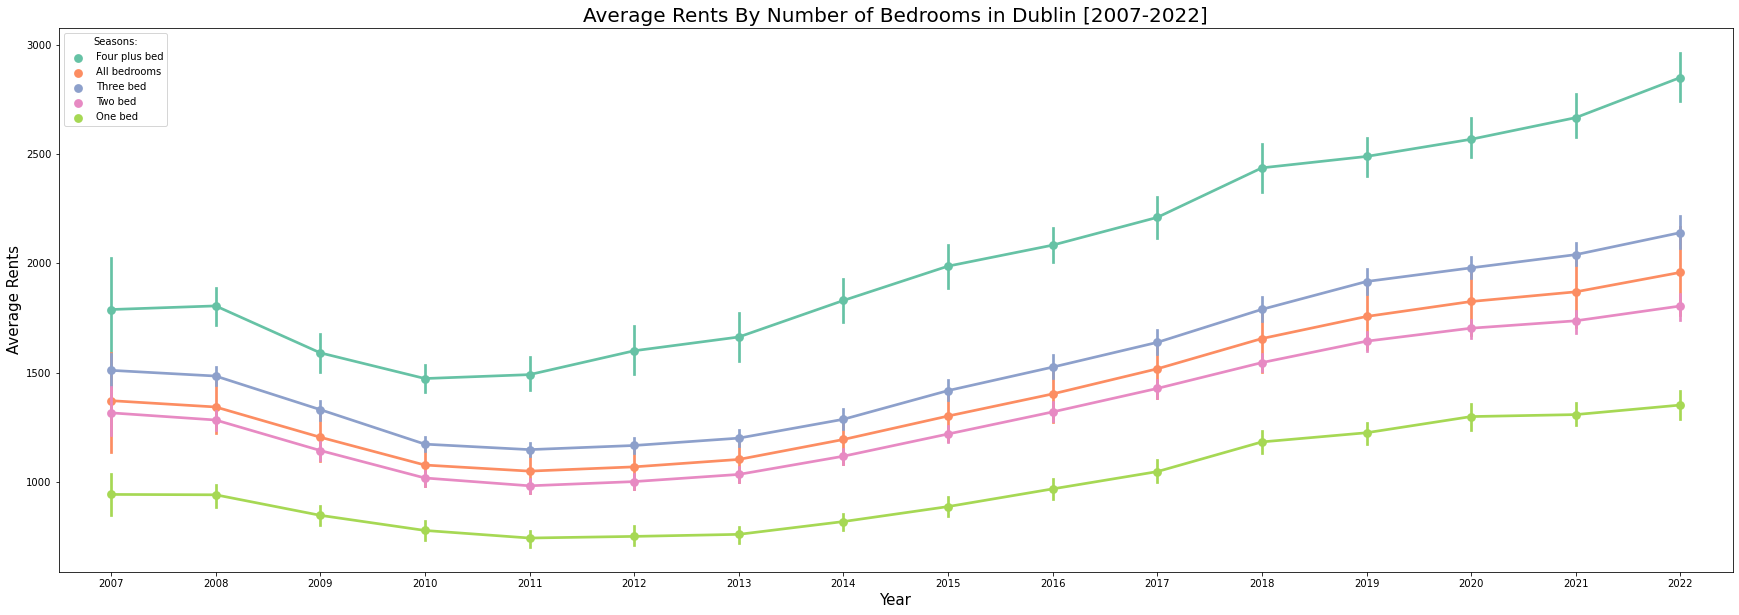

In [ ]:
#Time series of average rents by type of dwelling in Dublin from 2007 to 2022

fig, ax = plt.subplots(figsize=(30, 10))
sns.pointplot(x='Year', y='VALUE', hue='Number of Bedrooms', data=df_Dublin, palette='Set2')

plt.title('Average Rents By Number of Bedrooms in Dublin [2007-2022]', fontsize =20)
plt.ylabel("Average Rents", fontsize =15)
plt.xlabel('Year', fontsize =15)


plt.legend(title = "Seasons:", loc='upper left', fontsize=10)

plt.savefig('pointplot.png', dpi=300, bbox_inches='tight');

In [ ]:
df_Dublin.rename(columns = {'Number of Bedrooms':'Bedrooms', 'Property Type':'Property'}, inplace = True)

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
pd.crosstab(df_Dublin.Bedrooms, df_Dublin.Property)

Property,All property types,Apartment,Detached house,Other flats,Semi detached house,Terrace house
Bedrooms,,,,,,
All bedrooms,60,60,60,60,60,60
Four plus bed,60,60,60,21,60,60
One bed,60,60,57,60,60,60
Three bed,60,60,60,60,60,60
Two bed,60,60,60,60,60,60


In [ ]:
pd.crosstab(df_Dublin.Bedrooms, df_Dublin.Property, margins=True, normalize=True)

Property,All property types,Apartment,Detached house,Other flats,Semi detached house,Terrace house,All
Bedrooms,,,,,,,
All bedrooms,0.034130,0.034130,0.034130,0.034130,0.034130,0.034130,0.204778
Four plus bed,0.034130,0.034130,0.034130,0.011945,0.034130,0.034130,0.182594
One bed,0.034130,0.034130,0.032423,0.034130,0.034130,0.034130,0.203072
Three bed,0.034130,0.034130,0.034130,0.034130,0.034130,0.034130,0.204778
Two bed,0.034130,0.034130,0.034130,0.034130,0.034130,0.034130,0.204778
All,0.170648,0.170648,0.168942,0.148464,0.170648,0.170648,1.000000


In [ ]:
pd.crosstab(df_Dublin.Bedrooms, df_Dublin.Property, normalize='columns')

Property,All property types,Apartment,Detached house,Other flats,Semi detached house,Terrace house
Bedrooms,,,,,,
All bedrooms,0.2,0.2,0.202020,0.229885,0.2,0.2
Four plus bed,0.2,0.2,0.202020,0.080460,0.2,0.2
One bed,0.2,0.2,0.191919,0.229885,0.2,0.2
Three bed,0.2,0.2,0.202020,0.229885,0.2,0.2
Two bed,0.2,0.2,0.202020,0.229885,0.2,0.2


In [108]:
df_Dublin.pivot_table(index=['Location', 'Property','Bedrooms'], values=['VALUE'], columns=['Month'], aggfunc=np.mean)

VALUE               \
Month                                               Apr          Jan   
Location Property            Bedrooms                                  
Dublin   All property types  All bedrooms   1355.368000  1345.927333   
                             Four plus bed  2000.107333  1984.483333   
                             One bed        1010.154667  1006.229333   
                             Three bed      1524.037333  1512.058000   
                             Two bed        1373.943333  1363.942000   
         Apartment           All bedrooms   1345.847333  1336.584000   
                             Four plus bed  1980.568000  1949.470667   
                             One bed        1119.222667  1114.110000   
                             Three bed      1719.785333  1703.311333   
                             Two bed        1397.198000  1386.506667   
         Detached house      All bedrooms   1919.490000  1901.099333   
                             Four plus bed  2296.693333  2281.510667   
                             One bed        1125.948000  1102.908571   
                             Three bed      1657.725333  1641.489333   
                             Two bed        1431.773333  1420.732667   
         Other flats         All bedrooms    868.883333   864.407333   
                             Four plus bed  1185.535000  1197.775000   
                             One bed         791.960667   786.908667   
                             Three bed      1442.766000  1426.583333   
                             Two bed        1134.103333  1125.795333   
         Semi detached house All bedrooms   1526.341333  1515.171333   
                             Four plus bed  1882.462667  1867.698000   
                             One bed         936.126000   927.512667   
                             Three bed      1434.110667  1424.945333   
                             Two bed        1321.215333  1312.096667   
         Terrace house       All bedrooms   1460.910667  1449.903333   
                             Four plus bed  2014.176667  2001.370667   
                             One bed         982.201333   980.172667   
                             Three bed      1477.058000  1464.211333   
                             Two bed        1309.860667  1301.940667   

                                                                      
Month                                               Jul          Oct  
Location Property            Bedrooms                                 
Dublin   All property types  All bedrooms   1375.938000  1338.884000  
                             Four plus bed  2063.498000  1986.214667  
                             One bed        1016.824000   993.258000  
                             Three bed      1546.952667  1502.126000  
                             Two bed        1387.724667  1351.027333  
         Apartment           All bedrooms   1364.798667  1328.168000  
                             Four plus bed  2193.892000  2102.517333  
                             One bed        1128.458000  1104.734000  
                             Three bed      1742.238667  1696.090667  
                             Two bed        1411.700000  1373.177333  
         Detached house      All bedrooms   1963.525333  1887.730000  
                             Four plus bed  2353.291333  2265.183333  
                             One bed        1095.723571  1082.355000  
                             Three bed      1676.898667  1631.158667  
                             Two bed        1434.192667  1407.410000  
         Other flats         All bedrooms    881.260000   857.266000  
                             Four plus bed  1645.067000  1289.252857  
                             One bed         797.948000   777.035333  
                             Three bed      1460.734000  1415.850000  
                             Two bed        1149.525333  1123.001333  
         Semi detached house All bedroom

In [109]:
np.round(df_Dublin.pivot_table(index=['Location', 'Property','Bedrooms'], values=['VALUE'], columns=['Month'], aggfunc=np.mean),2)

VALUE                           
Month                                           Apr      Jan      Jul      Oct
Location Property            Bedrooms                                         
Dublin   All property types  All bedrooms   1355.37  1345.93  1375.94  1338.88
                             Four plus bed  2000.11  1984.48  2063.50  1986.21
                             One bed        1010.15  1006.23  1016.82   993.26
                             Three bed      1524.04  1512.06  1546.95  1502.13
                             Two bed        1373.94  1363.94  1387.72  1351.03
         Apartment           All bedrooms   1345.85  1336.58  1364.80  1328.17
                             Four plus bed  1980.57  1949.47  2193.89  2102.52
                             One bed        1119.22  1114.11  1128.46  1104.73
                             Three bed      1719.79  1703.31  1742.24  1696.09
                             Two bed        1397.20  1386.51  1411.70  1373.18
         Detached house      All bedrooms   1919.49  1901.10  1963.53  1887.73
                             Four plus bed  2296.69  2281.51  2353.29  2265.18
                             One bed        1125.95  1102.91  1095.72  1082.36
                             Three bed      1657.73  1641.49  1676.90  1631.16
                             Two bed        1431.77  1420.73  1434.19  1407.41
         Other flats         All bedrooms    868.88   864.41   881.26   857.27
                             Four plus bed  1185.54  1197.78  1645.07  1289.25
                             One bed         791.96   786.91   797.95   777.04
                             Three bed      1442.77  1426.58  1460.73  1415.85
                             Two bed        1134.10  1125.80  1149.53  1123.00
         Semi detached house All bedrooms   1526.34  1515.17  1554.66  1509.53
                             Four plus bed  1882.46  1867.70  1924.62  1861.12
                             One bed         936.13   927.51   931.95   913.07
                             Three bed      1434.11  1424.95  1452.73  1417.11
                             Two bed        1321.22  1312.10  1333.67  1304.25
         Terrace house       All bedrooms   1460.91  1449.90  1487.51  1445.18
                             Four plus bed  2014.18  2001.37  2069.04  1998.07
                             One bed         982.20   980.17   984.96   967.27
                             Three bed      1477.06  1464.21  1498.48  1456.41
                             Two bed        1309.86  1301.94  1320.70  1294.07

In [ ]:
np.round(df2.pivot_table(index='Location', values=['VALUE'], aggfunc=np.mean),2)